This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [72]:
import pandas as pd

import numpy as np

import tensorflow as tf

In [73]:
from scipy.io import loadmat
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw
mnist_path=r'C:\Users\hp\Downloads\mnist-original.mat\mnist-original1.mat'
mnist_raw=loadmat(mnist_path)
mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [74]:
# store data in X and target in y
X=mnist['data']
y=mnist['target']


#Our data is expected to has 70000 instances(rows) and 784 features(columns)

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))


Shape of X:(70000, 784)
Shape of Y:(70000,)


In [75]:
import matplotlib.pyplot as plt



0.0

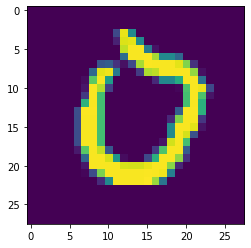

In [76]:
# pick any example from z, rehshape it to 28x28 type and display it using matplot
image=np.reshape(X[33],(28,28))
plt.imshow(image)

y[33]

In [77]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y
a=np.random.permutation(len(X))
X=X[a]
y=y[a]


In [78]:
# we are dividing the data in 60,000 and 10,000 for training and testing
train_x=X[0:60000]
test_x= X[-10000:]
train_y=y[0:60000]
test_y=y[-10000:]

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

model = RandomForestClassifier(random_state=42,n_estimators=10)
model.fit(train_x,train_y)

#create a rondom forest classifier with random state of 42 and fit your train varaibles 




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [80]:
# predict your train X varariable and find mean_absolute error it should be around 0.00333
predictions=model.predict(train_x)
print(mean_absolute_error(predictions,train_y))
# repeat the same for test X it should be around 0.205
predictions=model.predict(test_x)
print(mean_absolute_error(predictions,test_y))
accuracy=sum(predictions==test_y)/len(test_y)
print(accuracy)

0.0034833333333333335
0.1824
0.9489


In [81]:
X=X/255

In [82]:
train_x=X[0:60000]
test_x= X[-10000:]
train_y=y[0:60000]
test_y=y[-10000:]

In [83]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [84]:
# First order of business is creating the model
# for that purpose we've already imported the required things 
# your task is to use the above imported modules and whatever skills you have harnessed and build a model from scratch
# JUST A REMINDER , WE TRIED TO INTRODUCE YOU ALL WITH MOST OF THE LIBRARIES WHICH WE USE ON A DAILY BASIS
# ONE OF THEM IS KERAS USING WHICH YOU'LL IMPLEMENT THIS LAST ASSINGMENT 
# BUT DON'T WORRY THAT ITS NEW. THE CONCEPTS WHICH YOU ALL HAVE GAINED UPTIL NOW WILL ONLY BE USED 
# DON'T PANIC THAT YOU DON'T KNOW KERAS
# JUST GIVE IT A TRY. CREATING A MODEL IS SIMILAR TO THAT IN PYTORCH.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

# keras initializer
from tensorflow import keras
from tensorflow import layers

In [85]:
# model
model = keras.Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


In [86]:
# after creating the model compile it with proper optimizer and loss function 
model.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# You can refer to any keras model training for your reference 



In [87]:
# Fit your train datasets
model.fit(train_x,train_y,batch_size=128,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2592 - acc: 0.9242
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1098 - acc: 0.9678
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0747 - acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0561 - acc: 0.9842
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0427 - acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0334 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0266 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0227 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0188 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 3s 53us/sample - loss: 

In [88]:
# After fitting try your model with test dataset
# see the accuracy
model.evaluate(test_x,test_y,batch_size=128)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0869 - acc: 0.9769


[0.08690273067951203, 0.9769]

In [89]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.